In [137]:
#Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# All States

In [138]:
AllStates = pd.read_csv('../../../Data/Post1790/aggregated_CD_noname.csv') #Returns aggregated CSV file.
AllStates.drop(columns=['Unnamed: 0'], inplace=True) #Drop duplicate index column which appears.
print(AllStates) 

      6p_Dollar  6p_Cents  6p_def_Dollar  6p_def_Cents  3p_Dollar  3p_Cents  \
0        1064.0      75.0          532.0          37.0      508.0      51.0   
1         449.0      96.0          224.0          97.0      232.0      10.0   
2         154.0      20.0           77.0          10.0      192.0       NaN   
3         196.0      75.0           98.0          37.0      172.0      24.0   
4          53.0      58.0           26.0          79.0       67.0       6.0   
...         ...       ...            ...           ...        ...       ...   
4372      120.0      25.0           60.0          12.0       97.0      70.0   
4373       33.0      33.0           16.0          67.0       31.0      67.0   
4374      124.0      33.0           62.0          17.0      118.0      41.0   
4375      242.0      67.0          121.0          33.0       79.0      52.0   
4376      180.0      47.0           90.0          24.0      207.0      93.0   

                town state  occupation             

In [139]:
Occs = AllStates.dropna(subset=['occupation']).reset_index(drop=True) #Returns people who listed their occupations and reindexes the dataframe.
Occs = Occs[['6p_total']] #Only need 6% total column.
print(Occs)

      6p_total
0      1064.75
1       449.96
2       154.20
3       196.75
4        53.58
...        ...
2126     33.33
2127    120.25
2128     33.33
2129    124.33
2130    180.47

[2131 rows x 1 columns]


In [140]:
NoOccs = AllStates[AllStates['occupation'].isna()].reset_index(drop=True) #Returns people who did not list their occupations and reindexes the dataframe.
NoOccs = NoOccs[['6p_total']] #Only need 6% total column.
print(NoOccs)

      6p_total
0       345.50
1      1739.64
2        35.52
3      2195.36
4        54.77
...        ...
2241    800.00
2242       NaN
2243       NaN
2244     84.13
2245    242.67

[2246 rows x 1 columns]


In [141]:
def plot(NoOccs, Occs, state):
    plt.hist(NoOccs, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(NoOccs) / len(NoOccs)) #Plot
    plt.hist(Occs, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(Occs) / len(Occs)) #Plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")" 
    plt.title(title) #Add title
    plt.xlabel("Total 6% Continental Debt Held By an Individual in Dollars") #Add X-axis title
    plt.ylabel("Frequency") #Add Y-axis title
    plt.legend() #Add legend
    plt.savefig('./finished_histograms/' + state + '.png') #Save figure in stated directory.
    plt.show() #Display plot

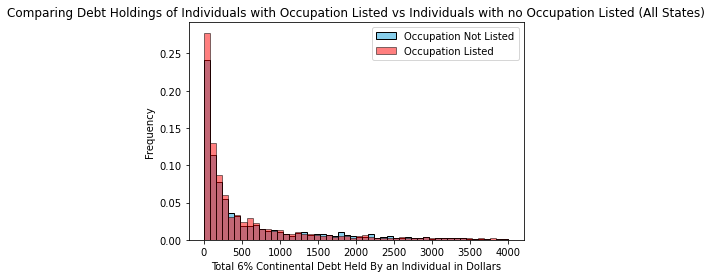

In [142]:
plot(NoOccs, Occs, 'All States')

# Individual States

In [143]:
states = ['CT', 'GA', 'MD', 'NC', 'NH', 'NJ', 'NY', 'PA', 'RI', 'SC', 'VA']

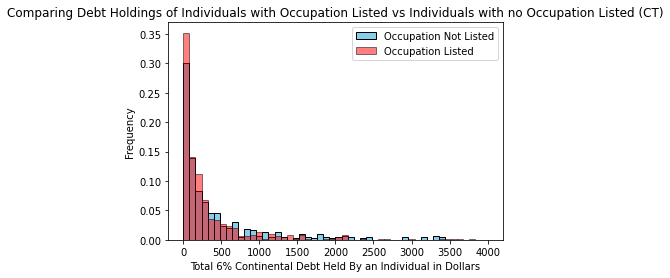

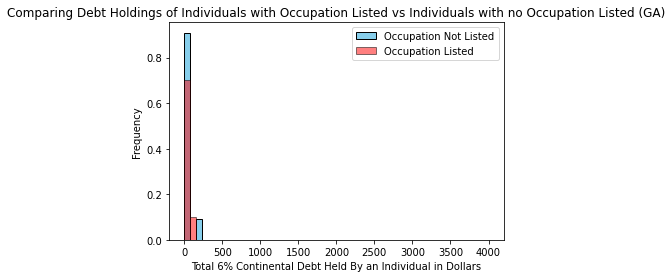

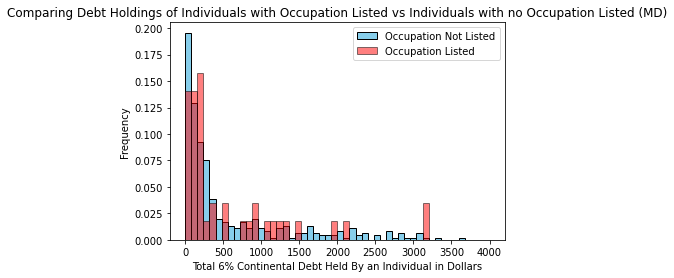

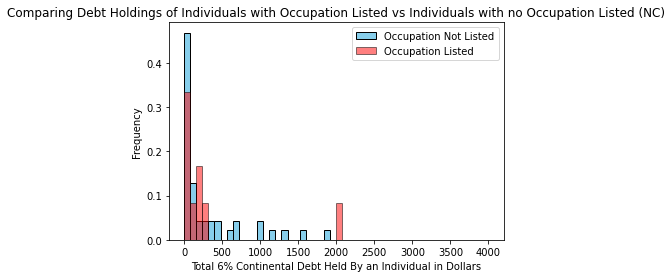

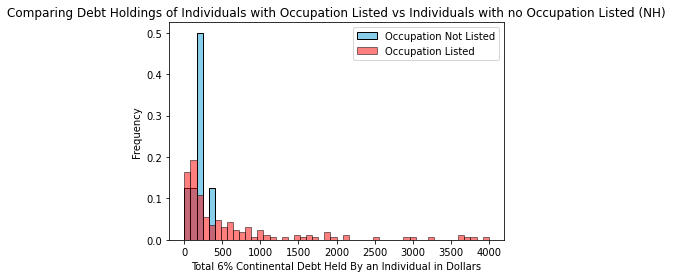

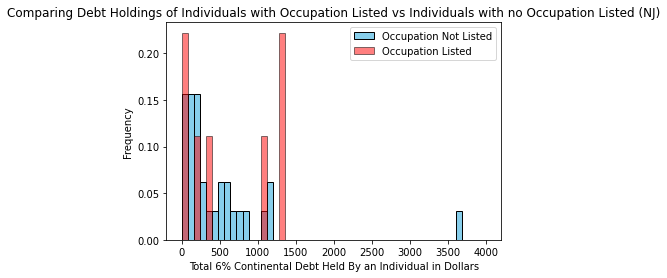

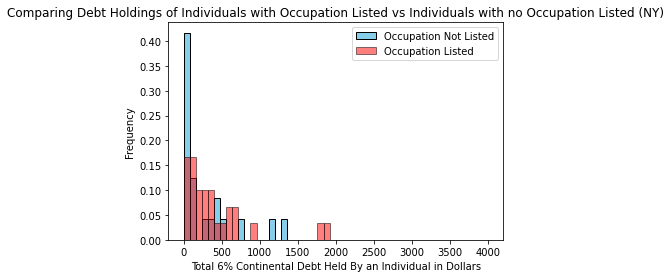

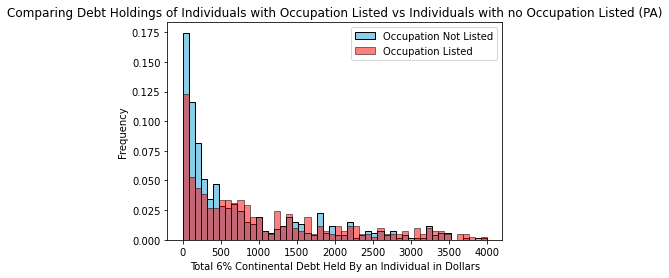

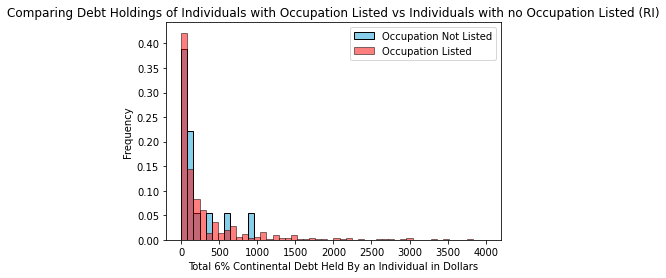

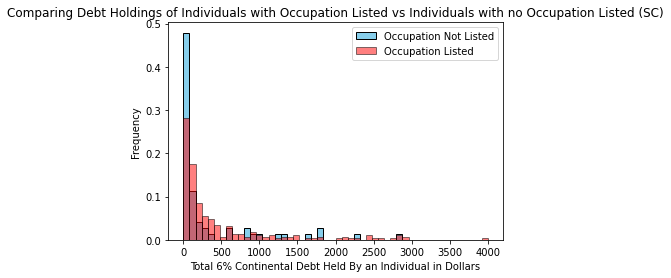

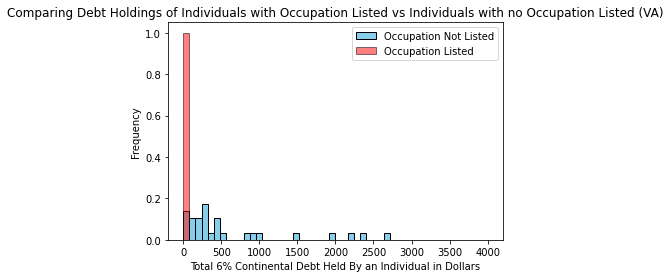

In [144]:
for state in states:
    IndivStateFile = AllStates[AllStates['state'] == state].reset_index(drop=True) #Separate rows by state
    StateOcc = IndivStateFile.dropna(subset=['occupation']).reset_index(drop=True) #Returns only people w/ occupation listed.
    StateOcc = StateOcc['6p_total'] #Returns the 6% total column.
    StateNoOcc = IndivStateFile[IndivStateFile['occupation'].isna()].reset_index(drop=True) #Returns only people w/o an occupation listed.
    StateNoOcc = StateNoOcc['6p_total'] #Returns the 6% total column.
    plot(StateNoOcc, StateOcc, state) #Plot